In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [40]:
df = pd.read_csv('DATA_Texas_District_v1.csv', sep=',', header=0)
print(df.shape)

df = pd.get_dummies(df, columns=['Locale'], prefix='Locale')
print(df.shape)

(1165, 950)
(1165, 961)


## Important Features for Math 
Selected from [Task3_Feature_Selection_Math.ipynb](Task3_Feature_Selection_Math.ipynb):
- `% On Campus 10/30/20`
- `% Tested Math G8 Diff`
- `CARES ESSER I 20` 
- `% Black Diff`
- `% Asian Diff`
- `% Reduced-price Lunch Diff`

In [41]:
top_math=['% On Campus 10/30/20',
 '% Tested Math G8 Diff',
 'CARES ESSER I 20', 
 '% Black Diff',
 '% Asian Diff',
 '% Reduced-price Lunch Diff']

**`% On Campus 10/30/20` - Math**

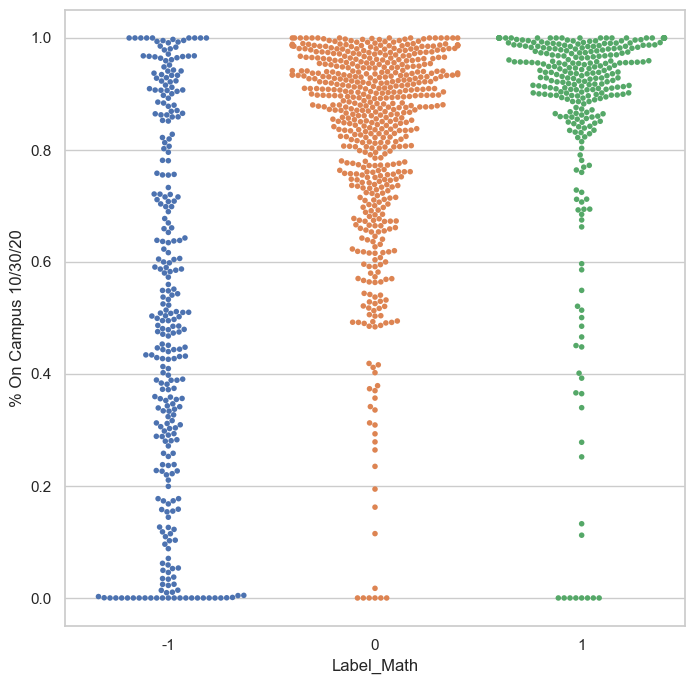

In [42]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
g=sns.swarmplot(data=df, x='Label_Math', y="% On Campus 10/30/20", size=4)
plt.show()

**`CARES ESSER I 20`**

In [43]:
cols = ['CARES ESSER I 20',
'CRRSA ESSER II 21',
'ARP ESSER III 21']
# 'ESSER-SUPP 22',
# 'ESSER-SUPP 23']

grant_math=pd.melt(df[cols+['Label_Math']], 'Label_Math', var_name='Grant')
grant_math['Label']=grant_math['Label_Math'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')

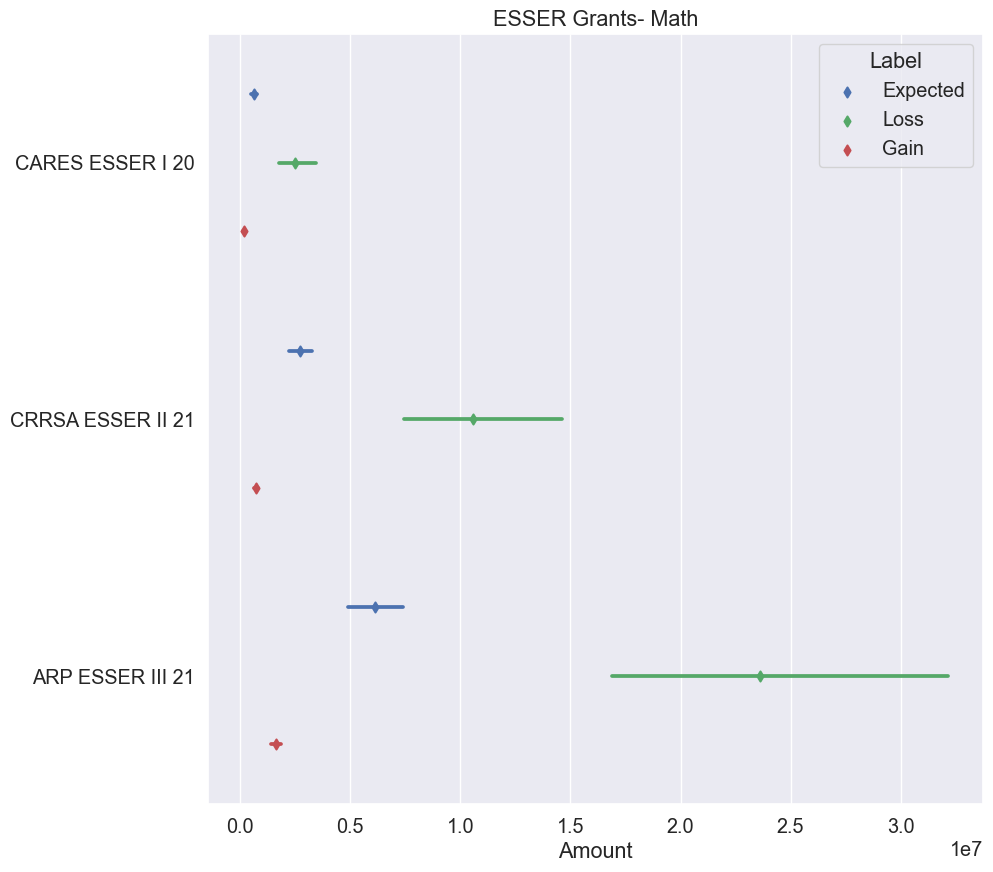

In [44]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)

g=sns.pointplot(
    data=grant_math, x="value", y="Grant", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None)

g.set(title='ESSER Grants- Math', xlabel='Amount', ylabel='')
# axes[0].set_xlim(0-0.05, 0.7+0.05)
plt.show()

**Race/Ethnicity - Math**

In [45]:
cols=['% Asian or Asian/Pacific Islander Students 2018-2019',
'% Hispanic Students 2018-2019',
'% Black or African American Students 2018-2019',
'% White Students 2018-2019']

race_19=pd.melt(df[cols+['Label_Math']], 'Label_Math', var_name='race')
race_19['Label']=race_19['Label_Math'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
race_19['Race/Ethnicity']=race_19['race'].apply(lambda x: x.split(' Students')[0][2:])

cols=['% Asian or Asian/Pacific Islander Students 2020-2021',
'% Hispanic Students 2020-2021',
'% Black or African American Students 2020-2021',
'% White Students 2020-2021']

race_21=pd.melt(df[cols+['Label_Math']], 'Label_Math', var_name='race')
race_21['Label']=race_21['Label_Math'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
race_21['Race/Ethnicity']=race_21['race'].apply(lambda x: x.split(' Students')[0][2:])

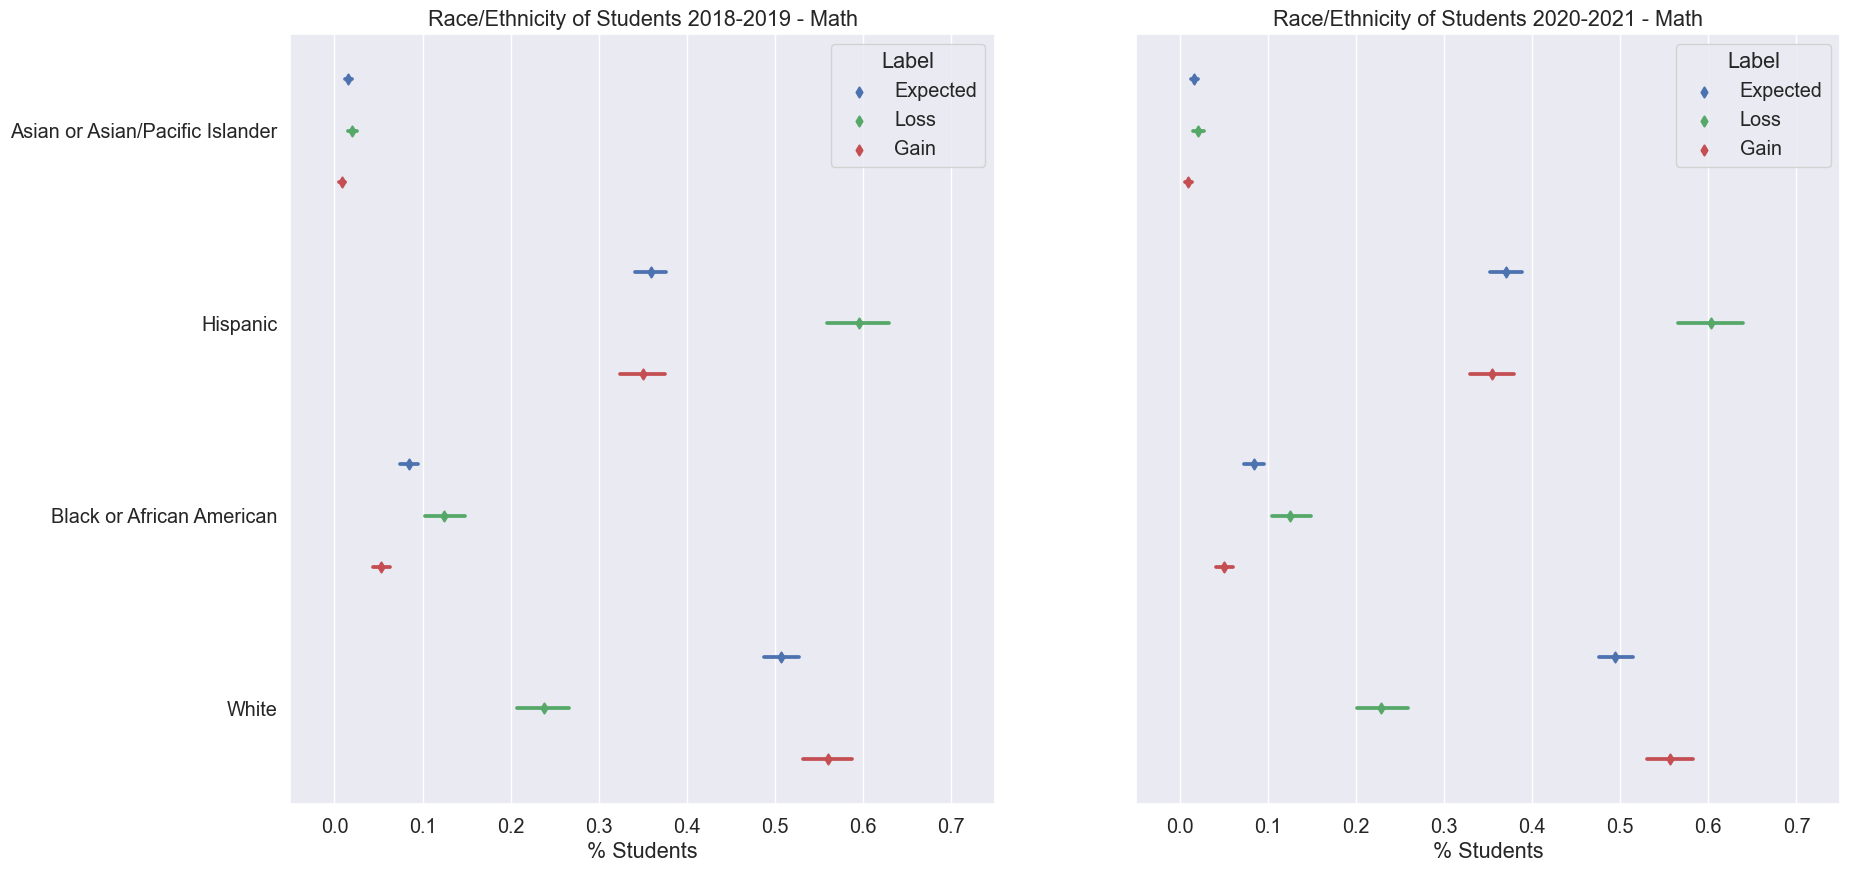

In [46]:
# sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)

fig, axes=plt.subplots(1,2, figsize=(20, 10))
sns.pointplot(
    data=race_19, x="value", y="Race/Ethnicity", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None, ax=axes[0]
)
axes[0].set(title='Race/Ethnicity of Students 2018-2019 - Math', xlabel='% Students', ylabel='')
axes[0].set_xlim(0-0.05, 0.7+0.05)
sns.pointplot(
    data=race_21, x="value", y="Race/Ethnicity", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None, ax=axes[1]
)
axes[1].set(title='Race/Ethnicity of Students 2020-2021 - Math', xlabel='% Students', ylabel='')
axes[1].set(yticklabels=[])
axes[1].set_xlim(0-0.05, 0.7+0.05)

plt.show()

**Reduced-price Lunch Eligible Students - Math**

In [47]:
cols=['% Reduced-price Lunch 2018-2019', '% Reduced-price Lunch 2020-2021']

lunch_math=pd.melt(df[cols+['Label_Math']], 'Label_Math', var_name='year')
lunch_math['Label']=lunch_math['Label_Math'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
lunch_math['Year']=lunch_math['year'].apply(lambda x: x.split('Lunch')[1])
lunch_math['value']=lunch_math['value']*100

lunch_reading=pd.melt(df[cols+['Label_Reading']], 'Label_Reading', var_name='year')
lunch_reading['Label']=lunch_reading['Label_Reading'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
lunch_reading['Year']=lunch_reading['year'].apply(lambda x: x.split('Lunch')[1])
lunch_reading['value']=lunch_reading['value']*100

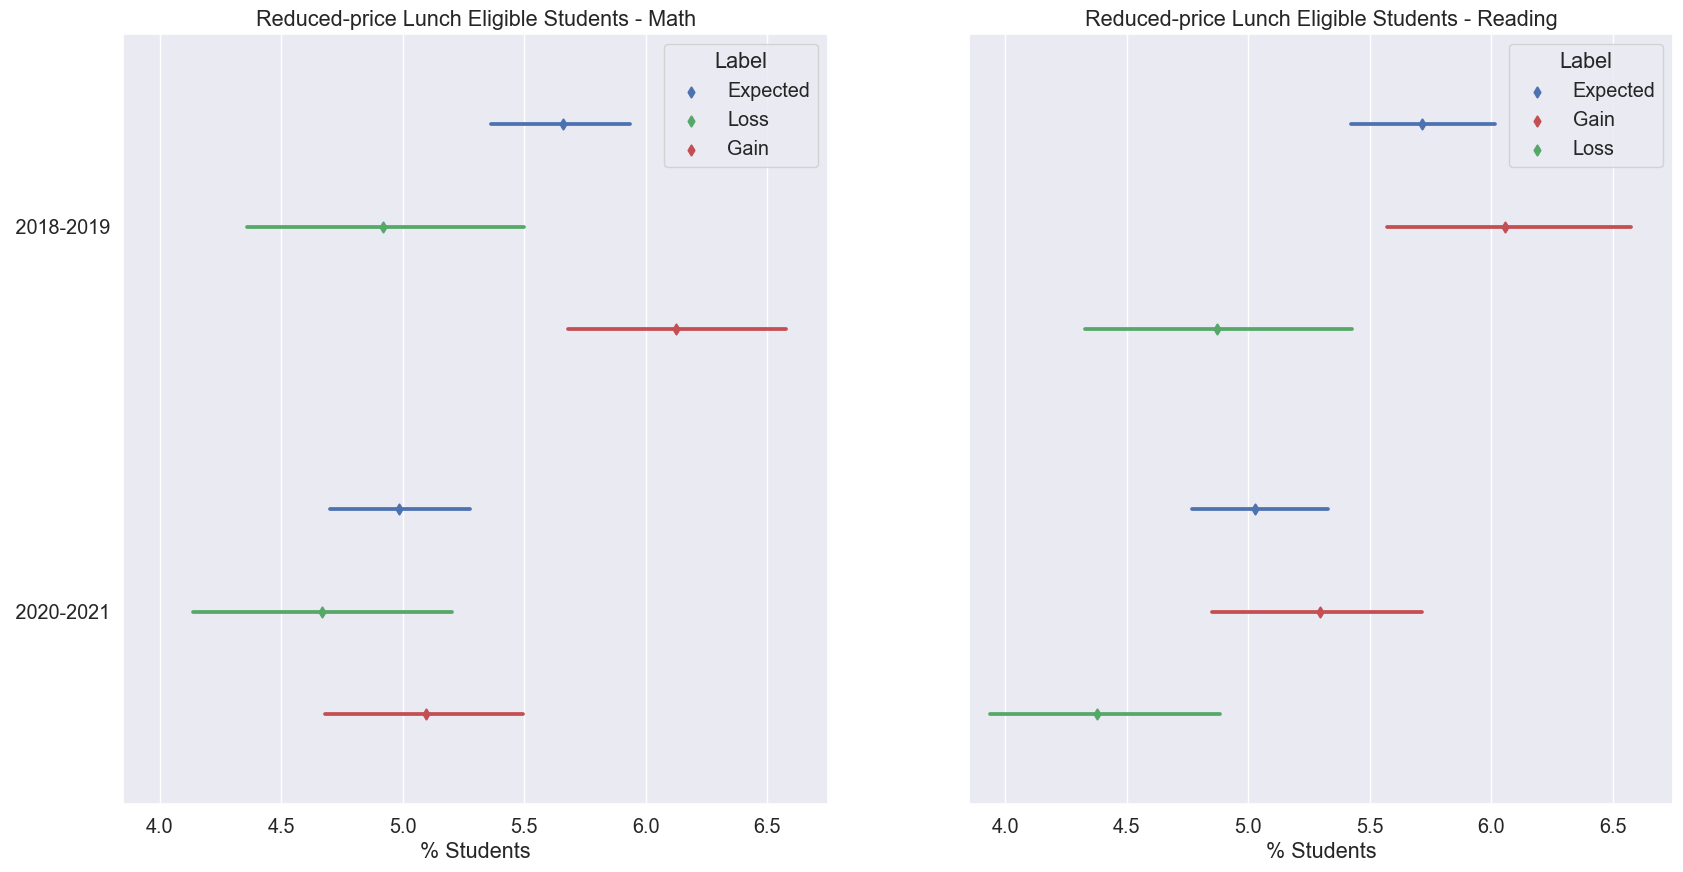

In [48]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)
margin=0.05

fig, axes=plt.subplots(1,2, figsize=(20, 10))
sns.pointplot(
    data=lunch_math, x="value", y="Year", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None, ax=axes[0]
)
axes[0].set(title='Reduced-price Lunch Eligible Students - Math', xlabel='% Students', ylabel='')
axes[0].set_xlim(3.9-margin, 6.7+margin)

sns.pointplot(
    data=lunch_reading, x="value", y="Year", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None, ax=axes[1]
)
axes[1].set(title='Reduced-price Lunch Eligible Students - Reading', xlabel='% Students', ylabel='')
axes[1].set(yticklabels=[])
axes[1].set_xlim(3.9-margin, 6.7+margin)

plt.show()

## Important Features for Reading 
Selected from [Task3_Feature_Selection_Reading.ipynb](Task3_Feature_Selection_Reading.ipynb)
- `% Reduced-price Lunch Diff`
- `ARP ESSER III 21`
- `CARES ESSER I 20`
- `CRRSA ESSER II 21`
- `% Black Diff`
- `% Prek Diff`
- `% On Campus 09/28/20`

In [49]:
top_reading=['% Reduced-price Lunch Diff',
 'ARP ESSER III 21',
 'CARES ESSER I 20',
 'CRRSA ESSER II 21',
 '% Black Diff',
 '% Prek Diff',
 '% On Campus 09/28/20']

**Reduced-price Lunch Eligible Students - Reading**

In [50]:
cols=['% Reduced-price Lunch 2018-2019', '% Reduced-price Lunch 2020-2021']

lunch_reading=pd.melt(df[cols+['Label_Reading']], 'Label_Reading', var_name='year')
lunch_reading['Label']=lunch_reading['Label_Reading'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
lunch_reading['Year']=lunch_reading['year'].apply(lambda x: x.split('Lunch')[1])
lunch_reading['value']=lunch_reading['value']*100

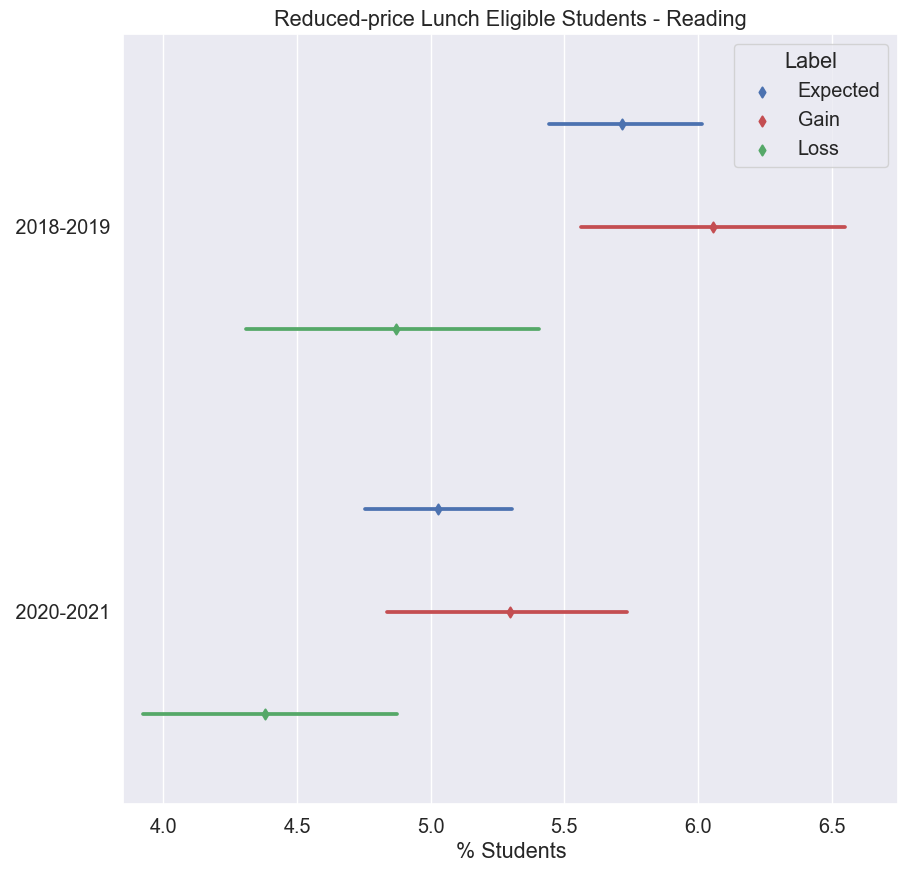

In [51]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)
margin=0.05

g = sns.pointplot(
    data=lunch_reading, x="value", y="Year", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None)

g.set(title='Reduced-price Lunch Eligible Students - Reading', xlabel='% Students', ylabel='')
g.set_xlim(3.9-margin, 6.7+margin)

plt.show()

**`CARES ESSER I 20`,  `CRRSA ESSER II 21`,  `ARP ESSER III 21`**

In [52]:
cols = ['CARES ESSER I 20',
'CRRSA ESSER II 21',
'ARP ESSER III 21']
# 'ESSER-SUPP 22',
# 'ESSER-SUPP 23']

grant_reading=pd.melt(df[cols+['Label_Reading']], 'Label_Reading', var_name='Grant')
grant_reading['Label']=grant_reading['Label_Reading'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')

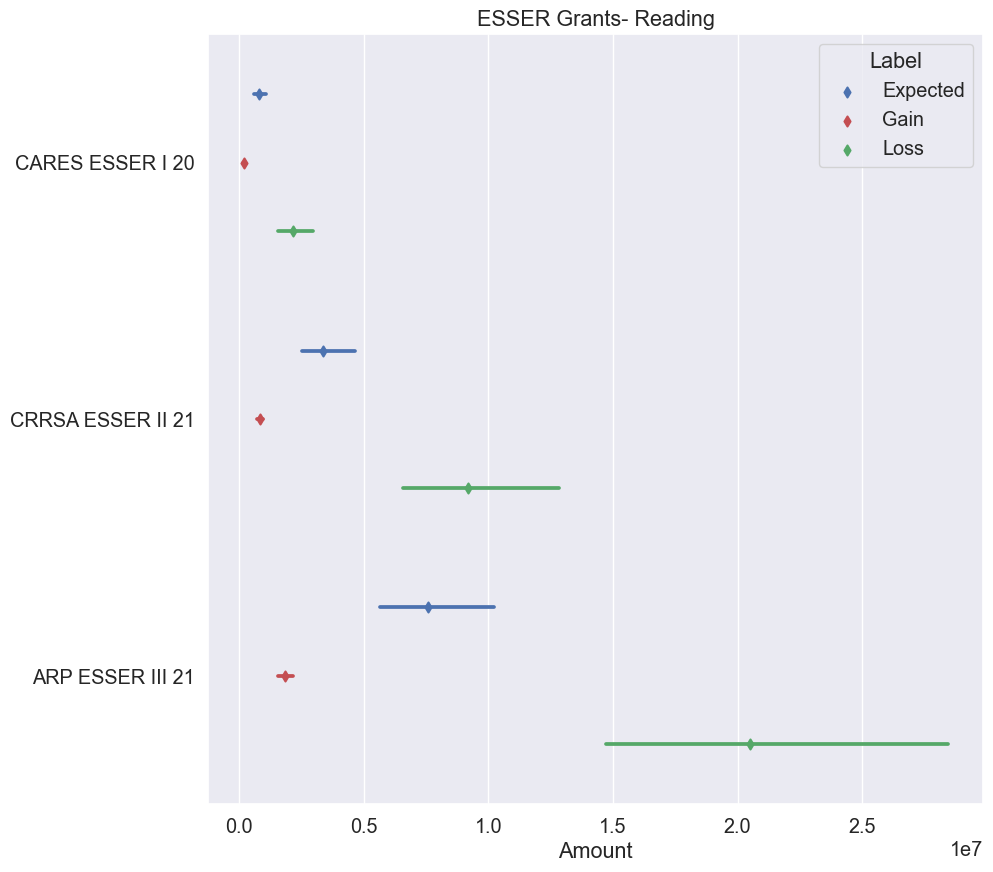

In [53]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)

g=sns.pointplot(
    data=grant_reading, x="value", y="Grant", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None)

g.set(title='ESSER Grants- Reading', xlabel='Amount', ylabel='')
# axes[0].set_xlim(0-0.05, 0.7+0.05)
plt.show()

**Race/Ethnicity - Reading**

In [54]:
cols=['% Asian or Asian/Pacific Islander Students 2018-2019',
'% Hispanic Students 2018-2019',
'% Black or African American Students 2018-2019',
'% White Students 2018-2019']

race_19=pd.melt(df[cols+['Label_Reading']], 'Label_Reading', var_name='race')
race_19['Label']=race_19['Label_Reading'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
race_19['Race/Ethnicity']=race_19['race'].apply(lambda x: x.split(' Students')[0][2:])

cols=['% Asian or Asian/Pacific Islander Students 2020-2021',
'% Hispanic Students 2020-2021',
'% Black or African American Students 2020-2021',
'% White Students 2020-2021']

race_21=pd.melt(df[cols+['Label_Reading']], 'Label_Reading', var_name='race')
race_21['Label']=race_21['Label_Reading'].apply(lambda x: 'Loss' if x==-1 else 'Gain' if x==1 else 'Expected')
race_21['Race/Ethnicity']=race_21['race'].apply(lambda x: x.split(' Students')[0][2:])

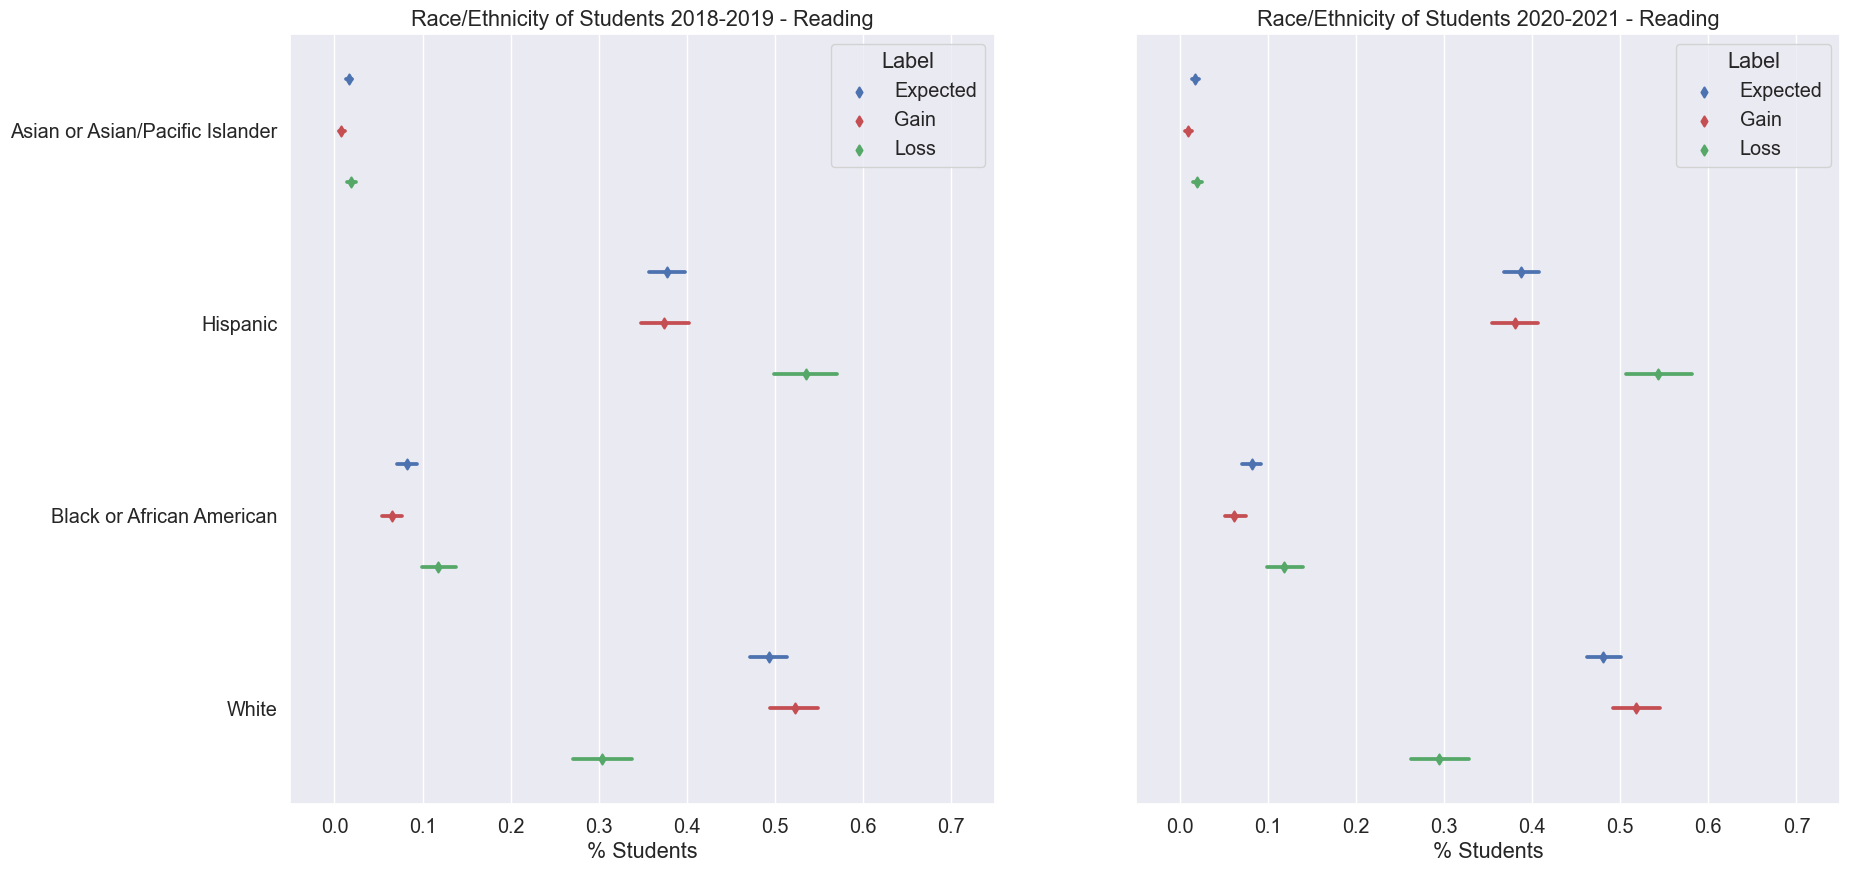

In [55]:
# sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.3)

fig, axes=plt.subplots(1,2, figsize=(20, 10))
sns.pointplot(
    data=race_19, x="value", y="Race/Ethnicity", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None, ax=axes[0]
)
axes[0].set(title='Race/Ethnicity of Students 2018-2019 - Reading', xlabel='% Students', ylabel='')
axes[0].set_xlim(0-0.05, 0.7+0.05)

sns.pointplot(
    data=race_21, x="value", y="Race/Ethnicity", hue="Label",
    join=False, dodge=.8 - .8 / 3, palette={'Expected': 'b', 'Gain': 'r', 'Loss': 'g'},
    markers="d", scale=.75, errorbar=None, ax=axes[1]
)
axes[1].set(title='Race/Ethnicity of Students 2020-2021 - Reading', xlabel='% Students', ylabel='')
axes[1].set(yticklabels=[])
axes[1].set_xlim(0-0.05, 0.7+0.05)

plt.show()

**`% On Campus 09/28/20` - Reading**

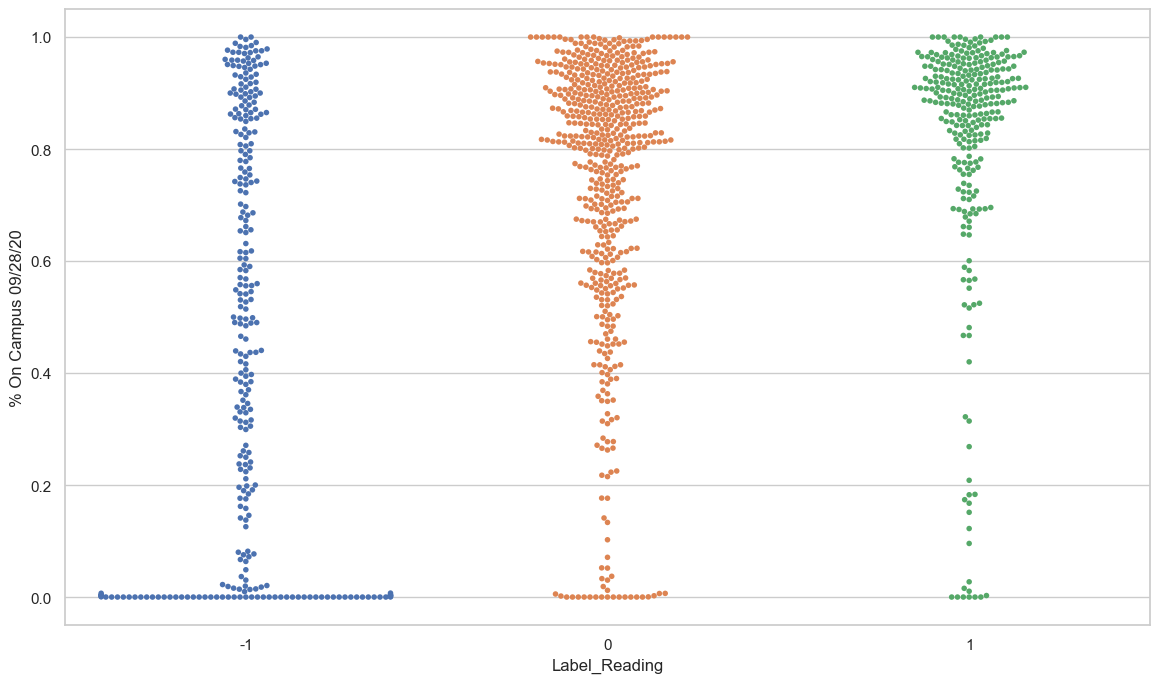

In [56]:
sns.set(rc={'figure.figsize':(14,8)})
sns.set_theme(style="whitegrid")
g=sns.swarmplot(data=df, x='Label_Reading', y="% On Campus 09/28/20", size=4)
plt.show()